In [3]:
!pip install astroquery
!pip install wget

In [4]:
from astropy.wcs import WCS
from photutils import detect_sources, deblend_sources, Background2D, MedianBackground
from photutils.segmentation import SourceCatalog, SegmentationImage
import statmorph
from statmorph.utils.image_diagnostics import make_figure
import csv

import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits

from astroquery.ned import Ned

import warnings
warnings.filterwarnings("ignore")

from astropy.io import fits
from matplotlib import pyplot as plt
import pandas as pd
import re

import subprocess
from astroquery.ipac.ned import Ned


import os
from PIL import Image
import urllib.request

from astroquery.ipac.ned import Ned
import wget

import pandas as pd

from astropy.table import Table

/tmp/ipykernel_19303/170478286.py:2: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  from photutils import detect_sources, deblend_sources, Background2D, MedianBackground
/tmp/ipykernel_19303/170478286.py:2: DeprecationWarning: `photutils.deblend_sources` is a deprecated alias for `photutils.segmentation.deblend_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import deblend_sources` to silence this warning.
  from photutils import detect_sources, deblend_sources, Background2D, MedianBackground
/tmp/ipykernel_19303/170478286.py:2: DeprecationWarning: `photutils.Background2D` is a deprecated alias for `photutils.background.Background2D` and will be removed in the future. Instead, please use `from photutils.background import Background2D` to silence

In [5]:
%run readtablesv2.py --tabledir /home/research/thesis/research/Virgo/v2/2024-04-25/

In [6]:
bibcode01='2001ApJS..135..125K'
bibcode06='2006ApJS..162...97K' #'2006AJ....131..716K'  #AJ is full sample of field galaxies  
result_tab06=Ned.query_refcode(bibcode06) ##ISOLATED GALAXIES
result_tab01=Ned.query_refcode(bibcode01) ##SPIRAL CLUSTER

In [7]:
#result_tab06

In [8]:
galname='NGC 0578'
result_tab = Ned.query_object(galname)
result_tab

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,NGC 0578,22.61875,-22.66719,G,1629.0,0.005434,S1L,11.44,--,201,5,61,20,22,20,1


In [9]:
image_list=Ned.get_image_list(galname)
image_list

['https://ned.ipac.caltech.edu/dss1B2/Bc/NGC_0578:I:IIIaJ:dss1.fits.gz',
 'https://ned.ipac.caltech.edu/img/1987ApJS...65..485C/NGC_0578:I:20cm:c1987.fits.gz',
 'https://ned.ipac.caltech.edu/img/2010PASP..122.1397S/NGC_0578:I:IRAC_4.5:srh2010.fits.gz',
 'https://ned.ipac.caltech.edu/img/2010PASP..122.1397S/NGC_0578:I:IRAC_3.6:srh2010.fits.gz',
 'https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_NGC_0578_K.fits.gz',
 'https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_NGC_0578_H.fits.gz',
 'https://ned.ipac.caltech.edu/img/2002ApJS..143...73E/NGC_0578:I:H:efp2002.fits.gz',
 'https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_NGC_0578_J.fits.gz',
 'https://ned.ipac.caltech.edu/img/2006ApJS..162...97K/NGC_0578:I:Ha:kk2006.fits.gz',
 'https://ned.ipac.caltech.edu/img/2006ApJS..162...97K/NGC_0578:I:R:kk2006.fits.gz',
 'https://ned.ipac.caltech.edu/img/2002ApJS..143...73E/NGC_0578:I:B:efp2002.fits.gz',
 'https://ned.ipac.caltech.edu/img/1989ESOLV.C...0000L/ESOLV2R/ES

## DOWNLOAD AN IMAGE

In [10]:
#for i in range(len(result_tab01)):
  #print(i, result_tab01['Object Name'][i])

In [11]:
image_list06 = Ned.get_image_list(result_tab06['Object Name'][i])
image_list01 = Ned.get_image_list(result_tab01['Object Name'][i])
image_list06

NameError: name 'i' is not defined

In [12]:
print(image_list)

['https://ned.ipac.caltech.edu/dss1B2/Bc/NGC_0578:I:IIIaJ:dss1.fits.gz', 'https://ned.ipac.caltech.edu/img/1987ApJS...65..485C/NGC_0578:I:20cm:c1987.fits.gz', 'https://ned.ipac.caltech.edu/img/2010PASP..122.1397S/NGC_0578:I:IRAC_4.5:srh2010.fits.gz', 'https://ned.ipac.caltech.edu/img/2010PASP..122.1397S/NGC_0578:I:IRAC_3.6:srh2010.fits.gz', 'https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_NGC_0578_K.fits.gz', 'https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_NGC_0578_H.fits.gz', 'https://ned.ipac.caltech.edu/img/2002ApJS..143...73E/NGC_0578:I:H:efp2002.fits.gz', 'https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_NGC_0578_J.fits.gz', 'https://ned.ipac.caltech.edu/img/2006ApJS..162...97K/NGC_0578:I:Ha:kk2006.fits.gz', 'https://ned.ipac.caltech.edu/img/2006ApJS..162...97K/NGC_0578:I:R:kk2006.fits.gz', 'https://ned.ipac.caltech.edu/img/2002ApJS..143...73E/NGC_0578:I:B:efp2002.fits.gz', 'https://ned.ipac.caltech.edu/img/1989ESOLV.C...0000L/ESOLV2R/ESO-LV_476015

In [13]:
result_tab01['Object Name'][1:2]

NGC 4178


### 2001 Table Download

In [14]:
for gal in result_tab01['Object Name'][1:2]:
    image_list01 = Ned.get_image_list(gal)
    for im in image_list:
        if 'kky2001' in im:
            if 'Ha' in im:
                outfile=gal.replace(' ','')+'_Ha.fits.gz'
            elif 'R' in im:
                outfile=gal.replace(' ','')+'_R.fits.gz'
            print(outfile,im)
            wget.download(im,outfile)
            if os.path.exists(outfile):
                print(f"{outfile} already exists. Skipping download.")
            else:
                print(outfile, im)
                wget.download(im, outfile)

### 2006 Table Download

In [15]:
for gal in result_tab06['Object Name'][0:3]:
    image_list06 = Ned.get_image_list(gal)
    for im in image_list06:
        if 'kk2006' in im:
            if 'Ha' in im:
                outfile = gal.replace(' ', '') + '_Ha.fits.gz'
            elif 'R' in im:
                outfile = gal.replace(' ', '') + '_R.fits.gz'
            else:
                continue
            if os.path.exists(outfile):
                print(f"{outfile} already exists. Skipping download.")
            else:
                print(f"Downloading {outfile} from {im}...")
                wget.download(im, outfile)
                print(f"Downloaded {outfile}.")

NGC0578_Ha.fits.gz already exists. Skipping download.
NGC0578_R.fits.gz already exists. Skipping download.
SN2016gkgHost_Ha.fits.gz already exists. Skipping download.
SN2016gkgHost_R.fits.gz already exists. Skipping download.
NGC0986_Ha.fits.gz already exists. Skipping download.
NGC0986_R.fits.gz already exists. Skipping download.


In [27]:
hfile06='NGC0578_Ha.fits.gz'
rfile06='NGC0578_R.fits.gz'
hhdu06 = fits.open(hfile06)
rhdu06 = fits.open(rfile06)

FileNotFoundError: [Errno 2] No such file or directory: 'NGC0578_Ha.fits.gz'

In [28]:
hfile01='NGC4178_Ha.fits.gz'
rfile01='NGC4178_R.fits.gz'
hhdu01 = fits.open(hfile)
rhdu01 = fits.open(rfile)

NameError: name 'hfile' is not defined

NameError: name 'rhdu' is not defined

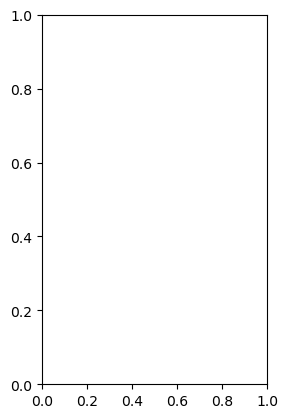

In [29]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(rhdu[0].data,cmap='gray_r')

plt.subplot(1,2,2)
plt.imshow(hhdu[0].data,cmap='gray_r')

In [30]:
VF = v.main
VF['VFID']=='VFID0610'

array([False, False, False, ..., False, False, False])

In [31]:
for i in range(len(VF["objname"])):
    flag = VF["objname"][i]==resulttab06["Object Name"]
    if np.sum(flag)>0:
        print(resulttab06["Object Name"][flag])

NameError: name 'resulttab06' is not defined

In [32]:
result_tab06.write('KK_2006_sample.csv', format='csv',overwrite=True)
result_tab01.write('KK_2001_sample.csv', format='csv',overwrite=True)

In [33]:
#resulttab01=result_tab01.to_pandas()
#resulttab06=result_tab06.to_pandas()
#combined = pd.concat([VF,resulttab01]) 
#combined

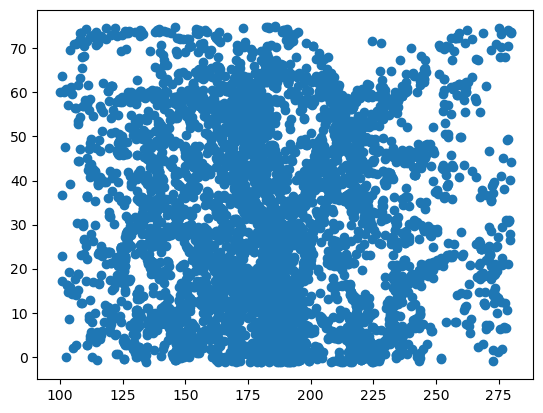

In [34]:
plt.scatter(VF['RA'],VF['DEC'])

## PLOTTING ISOLATED GALAXIES AND SPIRAL CLUSTERS

In [ ]:
plt.scatter(resulttab06['RA'],resulttab06['DEC']) ##ISOLATED

In [ ]:
plt.scatter(resulttab01['RA'],resulttab01['DEC']) #SPIRAL CLUSTER

In [ ]:
plt.scatter(v.main['RA'],v.main['DEC'],s=3, label="Virgo Sample")
plt.title("Isolated Galaxies and Cluster Spirals on full Virgo Catalog")
plt.xlabel("RA"); plt.ylabel("Dec")
plt.scatter(resulttab06['RA'],resulttab06['DEC'],s=10,label="Isolated Galaxies")
plt.scatter(resulttab01['RA'],resulttab01['DEC'],s=10, label="Cluster Galaxies")
plt.legend()
plt.ylim(-10,80);plt.xlim(75,300)
plt.gca().invert_xaxis()


## STATMORPH

In [35]:
def csv_append(filepath, results, target_id):
    csv_exists = os.path.isfile(filepath)

    existing_ids = set()
    if csv_exists:
        with open(filepath, 'r', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for col in reader:
                existing_ids.add(col['VFID'])
    
    if results['VFID'] in existing_ids:
            print(f"{target_id} already exists.")
            return
        
    with open(filepath, 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=results.keys())
        
        if not csv_exists:
            writer.writeheader()
     
        writer.writerow(results)
    
def run_one_statmorph(image, mask=None):
    """
    Takes in r-band and CS-gr fits files andruns statmorph
    saving the figures to a pdf and returning certain results
    """
        
    # Load the image FITS file
    hdul = fits.open(image)
    im_band_data = hdul[0].data
    im_band_header = hdul[0].header
    im_band_wcs = WCS(im_band_header)
        
    if mask:
        with fits.open(mask) as hdul:
            im_mask_data = hdul[0].data
        im_mask_data = im_mask_data.astype(bool)

    else:
        im_mask_data=None
    
    # Calculate the background
    ny,nx = im_band_data.shape
    bkg = Background2D(im_band_data, (ny,nx), filter_size=(11,11), bkg_estimator=MedianBackground())
    #r_band_data_sub = r_band_data - bkg.background
    #r_mask_data_sub = r_mask_data - bkg.background
    
    # Detect sources
    threshold = 2. * bkg.background_rms
    segm = detect_sources(im_band_data, threshold, npixels=5)

    # Deblend sources
    segm_deblend = deblend_sources(im_band_data, segm, npixels=5, nlevels=32, contrast=0.001)

    # Measure properties of detected sources
    cat = SourceCatalog(im_band_data, segm_deblend, wcs=im_band_wcs)
    return cat
    tbl = cat.to_table()

    # Select the largest source (assuming it is the galaxy)
    largest_source_idx = np.argmax(tbl['area'].data)
    largest_source_label = tbl['label'][largest_source_idx]
    segmap_gal = (segm_deblend.data == largest_source_label).astype(int)

    # Convert the segmentation map to a SegmentationImage object
    segmap_gal = SegmentationImage(segmap_gal)

    gain_im = im_band_header.get('GAIN', 1.0)
    
    # Run statmorph
    if mask:
        morph_im = statmorph.source_morphology(
            im_band_data, 
            segmap_gal, 
            gain=gain_im, 
            mask=im_mask_data
        )
    else:
        morph_im = statmorph.source_morphology(
            im_band_data, 
            segmap_gal, 
            gain=gain_im
        )
    
    # Saving figures to a pdf
    filename_im = im_band_fits.split('.fits')[0]
    morph_props_im = morph_im[0]
    fig1 = make_figure(morph_props_im)
    fig1.savefig(filename_im.replace('.fits','_statmorph.pdf'))



    # Extract and return desired morphology properties  
    results_im = {
        'xc_centroid': morph_props_im.xc_centroid,
        'yc_centroid': morph_props_im.yc_centroid,
        'ellipticity_centroid': morph_props_im.ellipticity_centroid,
        'elongation_centroid': morph_props_im.elongation_centroid,
        'orientation_centroid': morph_props_im.orientation_centroid,
        'xc_asymmetry': morph_props_im.xc_asymmetry,
        'yc_asymmetry': morph_props_im.yc_asymmetry,
        'ellipticity_asymmetry': morph_props_im.ellipticity_asymmetry,
        'elongation_asymmetry': morph_props_im.elongation_asymmetry,
        'orientation_asymmetry': morph_props_im.orientation_asymmetry,
        'rpetro_circ': morph_props_im.rpetro_circ,
        'rpetro_ellip': morph_props_im.rpetro_ellip,
        'rhalf_circ': morph_props_im.rhalf_circ,
        'rhalf_ellip': morph_props_im.rhalf_ellip,
        'r20': morph_props_im.r20,
        'r80': morph_props_im.r80,
        'Gini': morph_props_im.gini,
        'M20': morph_props_im.m20,
        'F(G, M20)': morph_props_im.gini_m20_bulge,
        'S(G, M20)': morph_props_im.gini_m20_merger,
        'sn_per_pixel': morph_props_im.sn_per_pixel,
        'C': morph_props_im.concentration,
        'A': morph_props_im.asymmetry,
        'S': morph_props_im.smoothness,
        'sersic_amplitude': morph_props_im.sersic_amplitude,
        'sersic_rhalf': morph_props_im.sersic_rhalf,
        'sersic_n': morph_props_im.sersic_n,
        'sersic_xc': morph_props_im.sersic_xc,
        'sersic_yc': morph_props_im.sersic_yc,
        'sersic_ellip': morph_props_im.sersic_ellip,
        'sersic_theta': morph_props_im.sersic_theta,
        'sersic_chi2_dof': morph_props_im.sersic_chi2_dof,
        'sky_mean': morph_props_im.sky_mean,
        'sky_median': morph_props_im.sky_median,
        'sky_sigma': morph_props_im.sky_sigma,
        'flag': morph_props_im.flag,
        'flag_sersic': morph_props_im.flag_sersic
    }
    
    return results_im

In [ ]:
results_im = run_one_statmorph('NGC0578_Ha.fits.gz')

In [ ]:
results_im.to_table()

In [ ]:
r_band_fits = 'NGC4178_R.fits/NGC_4808:I:R:kky2001.fits'  
cs_gr_fits = 'NGC4178_Ha.fits/NGC_4808:I:Ha:kky2001.fits'  
mask_file = None  

results_r, results_ha = run_statmorph(rfile06, hfile06, mask=mask_file, filepath='results_statmorph.csv')

#print("R-band results:", results_r)
#print("H-alpha results:", results_ha)

In [ ]:
r_band_fits = 'NGC4064_R.fits.gz'  
cs_gr_fits = 'NGC4064_Ha.fits.gz'  
mask_file = None  

results_r, results_ha = run_statmorph(r_band_fits, cs_gr_fits, mask=mask_file, filepath='results_statmorph.csv')

## PHOTWRAPPER

In [ ]:
%run halphagui-main/photwrapper.py

In [17]:
image1 ='NGC4064_R.fits.gz'
image2 = 'NGC4064_Ha.fits.gz'

e = ellipse(image1,image2=image2)
e.detect_objects()
e.find_central_object()
e.get_ellipse_guess()
e.draw_guess_ellipse_mpl()
e.measure_phot()
e.draw_phot_results_mpl()
e.calc_sb()
e.plot_profiles()

NameError: name 'ellipse' is not defined

## Running Statmorph on VFID 0610 from Virgo Filament Survey

#### Downloading the images (code from summer research)

In [18]:
v.main

desired_name = 'VFID0610'

# Check if the value is in the specified column
if desired_name in v.main['VFID']:
    print(f'The name "{desired_name}" is in the table.')
else:
    print(f'The name "{desired_name}" is not in the table.')

The name "VFID0610" is in the table.


In [19]:
hatab = v.halpha[v.main['HAobsflag']] #from main virgo filament survey which ones have HA
#hatab

In [20]:
def download_file(url, folder, filename):
    try:
        # Create the folder if it doesn't exist
        if not os.path.exists(folder):
            os.makedirs(folder)

        # Construct the full filepath
        filepath = os.path.join(folder, filename)

        # Download the file using wget
        result = subprocess.run(['wget', url, '-O', filepath], check=True)
        if result.returncode == 0:
            print(f'Downloaded {filename} to {folder}')
            return True
        else:
            print(f'Failed to retrieve {url}')
            return False

    except subprocess.CalledProcessError as e:
        print(f'Failed to retrieve from {url}: {e}')
        return False

### VFID0610

In [21]:
hatab = v.halpha[v.main['HAobsflag']] #from main virgo filament survey which ones have HA
dir_name = []
instruments = set(hatab['TEL'])

for i in range(len(hatab)):
    p = hatab['POINTING'][i]
    for inst in instruments:
        if inst in p:
            dir_name.append(hatab['prefix'][i] + '-' + inst + p.split(inst)[1])

#dir_name #This is the full files names from the VFS 

ha_filenames = []
rband_filenames = []
rmask_filenames = []


#for dname in dir_name:  
#base_dir = f'{dname}-NGC5985-BOK-20220424-{dname}'  # Modify as needed based on your context
h = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0610-NGC5985-INT-20190530-p040/VFID0610-NGC5985-INT-20190530-p040-CS-gr.fits'
r = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0610-NGC5985-INT-20190530-p040/VFID0610-NGC5985-INT-20190530-p040-R.fits'
rmask = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0610-NGC5985-INT-20190530-p040/VFID0610-NGC5985-INT-20190530-p040-R-mask.fits'
ha_filenames.append(h)
rband_filenames.append(r)
rmask_filenames.append(rmask)

h2 = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0775-UGC09837-BOK-20220425-VFID0776/VFID0775-UGC09837-BOK-20220425-VFID0776-CS-gr.fits'
r2 = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0775-UGC09837-BOK-20220425-VFID0776/VFID0775-UGC09837-BOK-20220425-VFID0776-R.fits'
rmask2 = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0775-UGC09837-BOK-20220425-VFID0776/VFID0775-UGC09837-BOK-20220425-VFID0776-R-mask.fits'
ha_filenames.append(h2)
rband_filenames.append(r2)
rmask_filenames.append(rmask2)

h3 = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0956-NGC3898-INT-20220502-VFID0957/VFID0956-NGC3898-INT-20220502-VFID0957-CS-gr.fits'
r3 = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0956-NGC3898-INT-20220502-VFID0957/VFID0956-NGC3898-INT-20220502-VFID0957-R.fits'
rmask3 = f'http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0956-NGC3898-INT-20220502-VFID0957/VFID0956-NGC3898-INT-20220502-VFID0957-R-mask.fits'
ha_filenames.append(h3)
rband_filenames.append(r3)
rmask_filenames.append(rmask3)


In [22]:
os.chdir("/home/research/thesis")

In [23]:
# Download HA files
for url in ha_filenames:
    filename = os.path.basename(url)
    folder = "HA_FILES"
    success = download_file(url, folder, filename)
    if success:
        print(f'File {filename} downloaded successfully to folder {folder}')
    else:
        print(f'Failed to download file {filename} from {url}')

# Download RBAND files
for url in rband_filenames:
    filename = os.path.basename(url)
    folder = "RBAND_FILES"
    success = download_file(url, folder, filename)
    if success:
        print(f'File {filename} downloaded successfully to folder {folder}')
    else:
        print(f'Failed to download file {filename} from {url}')

# Download RMASK files
for url in rmask_filenames:
    filename = os.path.basename(url)
    folder = "RMASK_FILES"
    success = download_file(url, folder, filename)
    if success:
        print(f'File {filename} downloaded successfully to folder {folder}')
    else:
        print(f'Failed to download file {filename} from {url}')


--2024-11-10 19:43:31--  http://199.223.247.130/fits/virgo-download/cutouts-20240805/VFID0610-NGC5985-INT-20190530-p040/VFID0610-NGC5985-INT-20190530-p040-CS-gr.fits
Connecting to 199.223.247.130:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26743680 (26M) [application/octet-stream]
Saving to: ‘HA_FILES/VFID0610-NGC5985-INT-20190530-p040-CS-gr.fits’

     0K .......... .......... .......... .......... ..........  0% 26.3M 1s
    50K .......... .......... .......... .......... ..........  0%  103M 1s
   100K .......... .......... .......... .......... ..........  0% 57.6M 1s
   150K .......... .......... .......... .......... ..........  0%  177M 0s
   200K .......... .......... .......... .......... ..........  0% 87.0M 0s
   250K .......... .......... .......... .......... ..........  1% 98.3M 0s
   300K .......... .......... .......... .......... ..........  1%  138M 0s
   350K .......... .......... .......... .......... ..........  1%  119M 0s
   400K .....

Downloaded VFID0610-NGC5985-INT-20190530-p040-CS-gr.fits to HA_FILES
File VFID0610-NGC5985-INT-20190530-p040-CS-gr.fits downloaded successfully to folder HA_FILES
Downloaded VFID0775-UGC09837-BOK-20220425-VFID0776-CS-gr.fits to HA_FILES
File VFID0775-UGC09837-BOK-20220425-VFID0776-CS-gr.fits downloaded successfully to folder HA_FILES


... .......... .......... .......... .......... 30% 92.3M 0s
 11100K .......... .......... .......... .......... .......... 30% 84.2M 0s
 11150K .......... .......... .......... .......... .......... 30%  183M 0s
 11200K .......... .......... .......... .......... .......... 30%  155M 0s
 11250K .......... .......... .......... .......... .......... 30% 89.2M 0s
 11300K .......... .......... .......... .......... .......... 31% 83.7M 0s
 11350K .......... .......... .......... .......... .......... 31%  210M 0s
 11400K .......... .......... .......... .......... .......... 31% 92.5M 0s
 11450K .......... .......... .......... .......... .......... 31%  142M 0s
 11500K .......... .......... .......... .......... .......... 31% 89.7M 0s
 11550K .......... .......... .......... .......... .......... 31% 90.3M 0s
 11600K .......... .......... .......... .......... .......... 31%  231M 0s
 11650K .......... .......... .......... .......... .......... 32% 85.5M 0s
 11700K .......... ........

Downloaded VFID0956-NGC3898-INT-20220502-VFID0957-CS-gr.fits to HA_FILES
File VFID0956-NGC3898-INT-20220502-VFID0957-CS-gr.fits downloaded successfully to folder HA_FILES


 .......... .......... .......... .......... 72% 95.1M 0s
 18900K .......... .......... .......... .......... .......... 72%  173M 0s
 18950K .......... .......... .......... .......... .......... 72%  101M 0s
 19000K .......... .......... .......... .......... .......... 72% 88.9M 0s
 19050K .......... .......... .......... .......... .......... 73%  180M 0s
 19100K .......... .......... .......... .......... .......... 73% 90.6M 0s
 19150K .......... .......... .......... .......... .......... 73% 89.9M 0s
 19200K .......... .......... .......... .......... .......... 73%  204M 0s
 19250K .......... .......... .......... .......... .......... 73% 89.4M 0s
 19300K .......... .......... .......... .......... .......... 74% 88.5M 0s
 19350K .......... .......... .......... .......... .......... 74%  183M 0s
 19400K .......... .......... .......... .......... .......... 74% 97.4M 0s
 19450K .......... .......... .......... .......... .......... 74%  100M 0s
 19500K .......... .......... 

Downloaded VFID0610-NGC5985-INT-20190530-p040-R.fits to RBAND_FILES
File VFID0610-NGC5985-INT-20190530-p040-R.fits downloaded successfully to folder RBAND_FILES
Downloaded VFID0775-UGC09837-BOK-20220425-VFID0776-R.fits to RBAND_FILES
File VFID0775-UGC09837-BOK-20220425-VFID0776-R.fits downloaded successfully to folder RBAND_FILES


..... .......... .......... 26%  197M 0s
  9800K .......... .......... .......... .......... .......... 27% 95.6M 0s
  9850K .......... .......... .......... .......... .......... 27% 88.0M 0s
  9900K .......... .......... .......... .......... .......... 27%  181M 0s
  9950K .......... .......... .......... .......... .......... 27% 84.9M 0s
 10000K .......... .......... .......... .......... .......... 27%  205M 0s
 10050K .......... .......... .......... .......... .......... 27% 82.6M 0s
 10100K .......... .......... .......... .......... .......... 27% 97.5M 0s
 10150K .......... .......... .......... .......... .......... 27%  165M 0s
 10200K .......... .......... .......... .......... .......... 28% 94.4M 0s
 10250K .......... .......... .......... .......... .......... 28%  173M 0s
 10300K .......... .......... .......... .......... .......... 28% 91.1M 0s
 10350K .......... .......... .......... .......... .......... 28% 89.2M 0s
 10400K .......... .......... .......... ......

Downloaded VFID0956-NGC3898-INT-20220502-VFID0957-R.fits to RBAND_FILES
File VFID0956-NGC3898-INT-20220502-VFID0957-R.fits downloaded successfully to folder RBAND_FILES


...... .......... 62% 92.8M 0s
 16250K .......... .......... .......... .......... .......... 62%  164M 0s
 16300K .......... .......... .......... .......... .......... 62% 89.7M 0s
 16350K .......... .......... .......... .......... .......... 62%  151M 0s
 16400K .......... .......... .......... .......... .......... 62%  107M 0s
 16450K .......... .......... .......... .......... .......... 63% 87.8M 0s
 16500K .......... .......... .......... .......... .......... 63%  103M 0s
 16550K .......... .......... .......... .......... .......... 63%  159M 0s
 16600K .......... .......... .......... .......... .......... 63% 91.5M 0s
 16650K .......... .......... .......... .......... .......... 63% 97.6M 0s
 16700K .......... .......... .......... .......... .......... 64%  179M 0s
 16750K .......... .......... .......... .......... .......... 64% 98.2M 0s
 16800K .......... .......... .......... .......... .......... 64% 86.1M 0s
 16850K .......... .......... .......... .......... .....

Downloaded VFID0610-NGC5985-INT-20190530-p040-R-mask.fits to RMASK_FILES
File VFID0610-NGC5985-INT-20190530-p040-R-mask.fits downloaded successfully to folder RMASK_FILES
Downloaded VFID0775-UGC09837-BOK-20220425-VFID0776-R-mask.fits to RMASK_FILES
File VFID0775-UGC09837-BOK-20220425-VFID0776-R-mask.fits downloaded successfully to folder RMASK_FILES


. .......... .......... .......... 16% 89.1M 0s
  6050K .......... .......... .......... .......... .......... 16%  191M 0s
  6100K .......... .......... .......... .......... .......... 16% 94.8M 0s
  6150K .......... .......... .......... .......... .......... 17% 97.1M 0s
  6200K .......... .......... .......... .......... .......... 17% 96.9M 0s
  6250K .......... .......... .......... .......... .......... 17%  157M 0s
  6300K .......... .......... .......... .......... .......... 17% 97.8M 0s
  6350K .......... .......... .......... .......... .......... 17%  175M 0s
  6400K .......... .......... .......... .......... .......... 17% 91.8M 0s
  6450K .......... .......... .......... .......... .......... 17%  112M 0s
  6500K .......... .......... .......... .......... .......... 17%  141M 0s
  6550K .......... .......... .......... .......... .......... 18% 93.0M 0s
  6600K .......... .......... .......... .......... .......... 18% 97.7M 0s
  6650K .......... .......... ..........

Downloaded VFID0956-NGC3898-INT-20220502-VFID0957-R-mask.fits to RMASK_FILES
File VFID0956-NGC3898-INT-20220502-VFID0957-R-mask.fits downloaded successfully to folder RMASK_FILES


. .......... .......... 80% 93.8M 0s
 29250K .......... .......... .......... .......... .......... 80% 94.6M 0s
 29300K .......... .......... .......... .......... .......... 80% 89.9M 0s
 29350K .......... .......... .......... .......... .......... 80%  234M 0s
 29400K .......... .......... .......... .......... .......... 80% 91.7M 0s
 29450K .......... .......... .......... .......... .......... 80%  167M 0s
 29500K .......... .......... .......... .......... .......... 81% 99.2M 0s
 29550K .......... .......... .......... .......... .......... 81% 96.1M 0s
 29600K .......... .......... .......... .......... .......... 81% 97.1M 0s
 29650K .......... .......... .......... .......... .......... 81%  170M 0s
 29700K .......... .......... .......... .......... .......... 81% 98.0M 0s
 29750K .......... .......... .......... .......... .......... 81% 93.9M 0s
 29800K .......... .......... .......... .......... .......... 81%  182M 0s
 29850K .......... .......... .......... ..........

In [39]:
def run_statmorph(r_band_fits, cs_gr_fits, mask=None, filepath='testing_statmorph.csv'):
    """
    Takes in r-band and CS-gr fits files andruns statmorph
    saving the figures to a pdf and returning certain results
    """
    # Load the r-band FITS file
    with fits.open(r_band_fits) as hdul:
        r_band_data = hdul[0].data
        r_band_header = hdul[0].header
        r_band_wcs = WCS(r_band_header)
        
    if mask:
        with fits.open(mask) as hdul:
            r_mask_data = hdul[0].data
        r_mask_data = r_mask_data.astype(bool)

    # Load the CS-gr FITS file
    with fits.open(cs_gr_fits) as hdul:
        cs_gr_data = hdul[0].data
        cs_gr_header = hdul[0].header
        cs_gr_wcs = WCS(cs_gr_header)
    
    # Calculate the background
    bkg = Background2D(r_band_data, (50, 50), filter_size=(3, 3), bkg_estimator=MedianBackground())
    #r_band_data_sub = r_band_data - bkg.background
    #r_mask_data_sub = r_mask_data - bkg.background
    
    # Detect sources
    threshold = 2. * bkg.background_rms
    segm = detect_sources(r_band_data, threshold, npixels=5)

    # Deblend sources
    segm_deblend = deblend_sources(r_band_data, segm, npixels=5, nlevels=32, contrast=0.001)

    # Measure properties of detected sources
    cat = SourceCatalog(r_band_data, segm_deblend, wcs=r_band_wcs)
    tbl = cat.to_table()

    # Select the largest source (assuming it is the galaxy)
    largest_source_idx = np.argmax(tbl['area'].data)
    largest_source_label = tbl['label'][largest_source_idx]
    segmap_gal = (segm_deblend.data == largest_source_label).astype(int)

    # Convert the segmentation map to a SegmentationImage object
    segmap_gal = SegmentationImage(segmap_gal)

    gain_r = r_band_header.get('GAIN', 1.0)
    gain_ha = cs_gr_header.get('GAIN', 1.0)
    
    # Run statmorph
    if mask:
        morph_r = statmorph.source_morphology(
            r_band_data, 
            segmap_gal, 
            gain=gain_r, 
            mask=r_mask_data
        )
    else:
        morph_r = statmorph.source_morphology(
            r_band_data, 
            segmap_gal, 
            gain=gain_r
        )
    
    morph_ha = statmorph.source_morphology(
        cs_gr_data, 
        segmap_gal, 
        gain=gain_ha
    )
    
    # Saving figures to a pdf
    filename_r = r_band_fits.split('.fits')[0]
    morph_props_r = morph_r[0]
    fig1 = make_figure(morph_props_r)
    fig1.savefig(filename_r+'_statmorph.pdf')

    filename_ha = cs_gr_fits.split('.fits')[0]
    morph_props_ha = morph_ha[0]
    fig2 = make_figure(morph_props_ha)
    fig2.savefig(filename_ha+'_statmorph.pdf')

    # Grabbing VFID for properties
    for split in r_band_fits.split('/'):
        if "VFID" in split:
            target_id = split.split('-')[0]
        else:
            continue

    # Extract and return desired morphology properties  
    results_r = {
        'VFID': target_id,
        'xc_centroid': morph_props_r.xc_centroid,
        'yc_centroid': morph_props_r.yc_centroid,
        'ellipticity_centroid': morph_props_r.ellipticity_centroid,
        'elongation_centroid': morph_props_r.elongation_centroid,
        'orientation_centroid': morph_props_r.orientation_centroid,
        'xc_asymmetry': morph_props_r.xc_asymmetry,
        'yc_asymmetry': morph_props_r.yc_asymmetry,
        'ellipticity_asymmetry': morph_props_r.ellipticity_asymmetry,
        'elongation_asymmetry': morph_props_r.elongation_asymmetry,
        'orientation_asymmetry': morph_props_r.orientation_asymmetry,
        'rpetro_circ': morph_props_r.rpetro_circ,
        'rpetro_ellip': morph_props_r.rpetro_ellip,
        'rhalf_circ': morph_props_r.rhalf_circ,
        'rhalf_ellip': morph_props_r.rhalf_ellip,
        'r20': morph_props_r.r20,
        'r80': morph_props_r.r80,
        'Gini': morph_props_r.gini,
        'M20': morph_props_r.m20,
        'F(G, M20)': morph_props_r.gini_m20_bulge,
        'S(G, M20)': morph_props_r.gini_m20_merger,
        'sn_per_pixel': morph_props_r.sn_per_pixel,
        'C': morph_props_r.concentration,
        'A': morph_props_r.asymmetry,
        'S': morph_props_r.smoothness,
        'sersic_amplitude': morph_props_r.sersic_amplitude,
        'sersic_rhalf': morph_props_r.sersic_rhalf,
        'sersic_n': morph_props_r.sersic_n,
        'sersic_xc': morph_props_r.sersic_xc,
        'sersic_yc': morph_props_r.sersic_yc,
        'sersic_ellip': morph_props_r.sersic_ellip,
        'sersic_theta': morph_props_r.sersic_theta,
        'sersic_chi2_dof': morph_props_r.sersic_chi2_dof,
        'sky_mean': morph_props_r.sky_mean,
        'sky_median': morph_props_r.sky_median,
        'sky_sigma': morph_props_r.sky_sigma,
        'flag': morph_props_r.flag,
        'flag_sersic': morph_props_r.flag_sersic
    }
    
    results_ha = {
        'VFID': target_id,
        'xc_centroid': morph_props_ha.xc_centroid,
        'yc_centroid': morph_props_ha.yc_centroid,
        'ellipticity_centroid': morph_props_ha.ellipticity_centroid,
        'elongation_centroid': morph_props_ha.elongation_centroid,
        'orientation_centroid': morph_props_ha.orientation_centroid,
        'xc_asymmetry': morph_props_ha.xc_asymmetry,
        'yc_asymmetry': morph_props_ha.yc_asymmetry,
        'ellipticity_asymmetry': morph_props_ha.ellipticity_asymmetry,
        'elongation_asymmetry': morph_props_ha.elongation_asymmetry,
        'orientation_asymmetry': morph_props_ha.orientation_asymmetry,
        'rpetro_circ': morph_props_ha.rpetro_circ,
        'rpetro_ellip': morph_props_ha.rpetro_ellip,
        'rhalf_circ': morph_props_ha.rhalf_circ,
        'rhalf_ellip': morph_props_ha.rhalf_ellip,
        'r20': morph_props_ha.r20,
        'r80': morph_props_ha.r80,
        'Gini': morph_props_ha.gini,
        'M20': morph_props_ha.m20,
        'F(G, M20)': morph_props_ha.gini_m20_bulge,
        'S(G, M20)': morph_props_ha.gini_m20_merger,
        'sn_per_pixel': morph_props_ha.sn_per_pixel,
        'C': morph_props_ha.concentration,
        'A': morph_props_ha.asymmetry,
        'S': morph_props_ha.smoothness,
        'sersic_amplitude': morph_props_ha.sersic_amplitude,
        'sersic_rhalf': morph_props_ha.sersic_rhalf,
        'sersic_n': morph_props_ha.sersic_n,
        'sersic_xc': morph_props_ha.sersic_xc,
        'sersic_yc': morph_props_ha.sersic_yc,
        'sersic_ellip': morph_props_ha.sersic_ellip,
        'sersic_theta': morph_props_ha.sersic_theta,
        'sersic_chi2_dof': morph_props_ha.sersic_chi2_dof,
        'sky_mean': morph_props_ha.sky_mean,
        'sky_median': morph_props_ha.sky_median,
        'sky_sigma': morph_props_ha.sky_sigma,
        'flag': morph_props_ha.flag,
        'flag_sersic': morph_props_ha.flag_sersic
    }
    
    # csv_path = filepath.split('.csv')
    # r_path = f"{csv_path[0]}_r-band.csv"
    # ha_path = f"{csv_path[0]}_h-alpha.csv"
    # csv_append(r_path, results_r, target_id)
    # csv_append(ha_path, results_ha, target_id)
    
    return results_r, results_ha

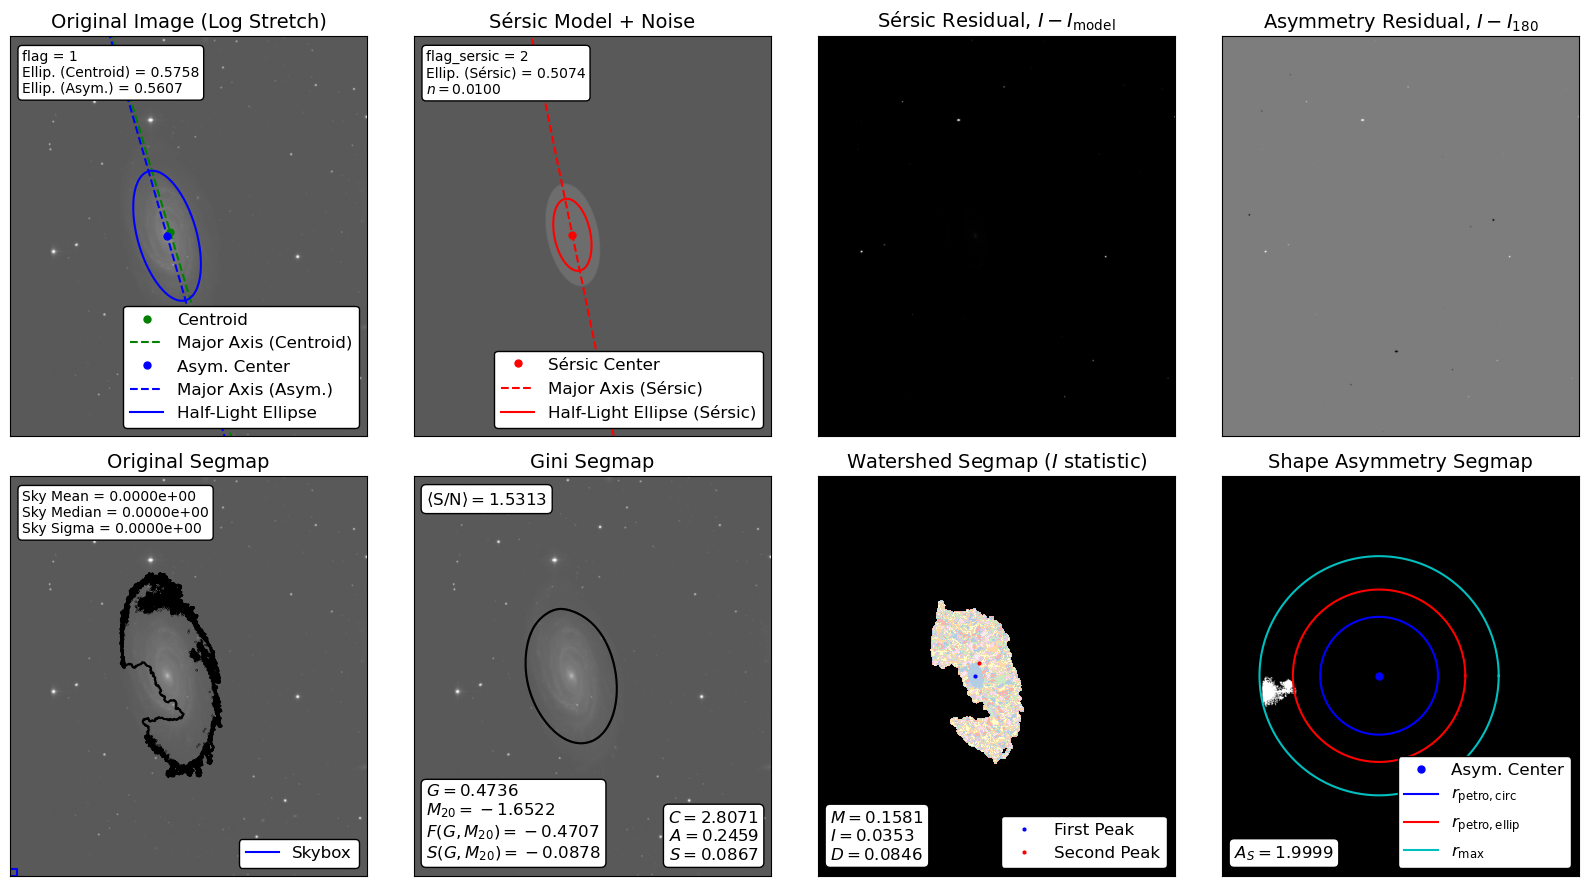

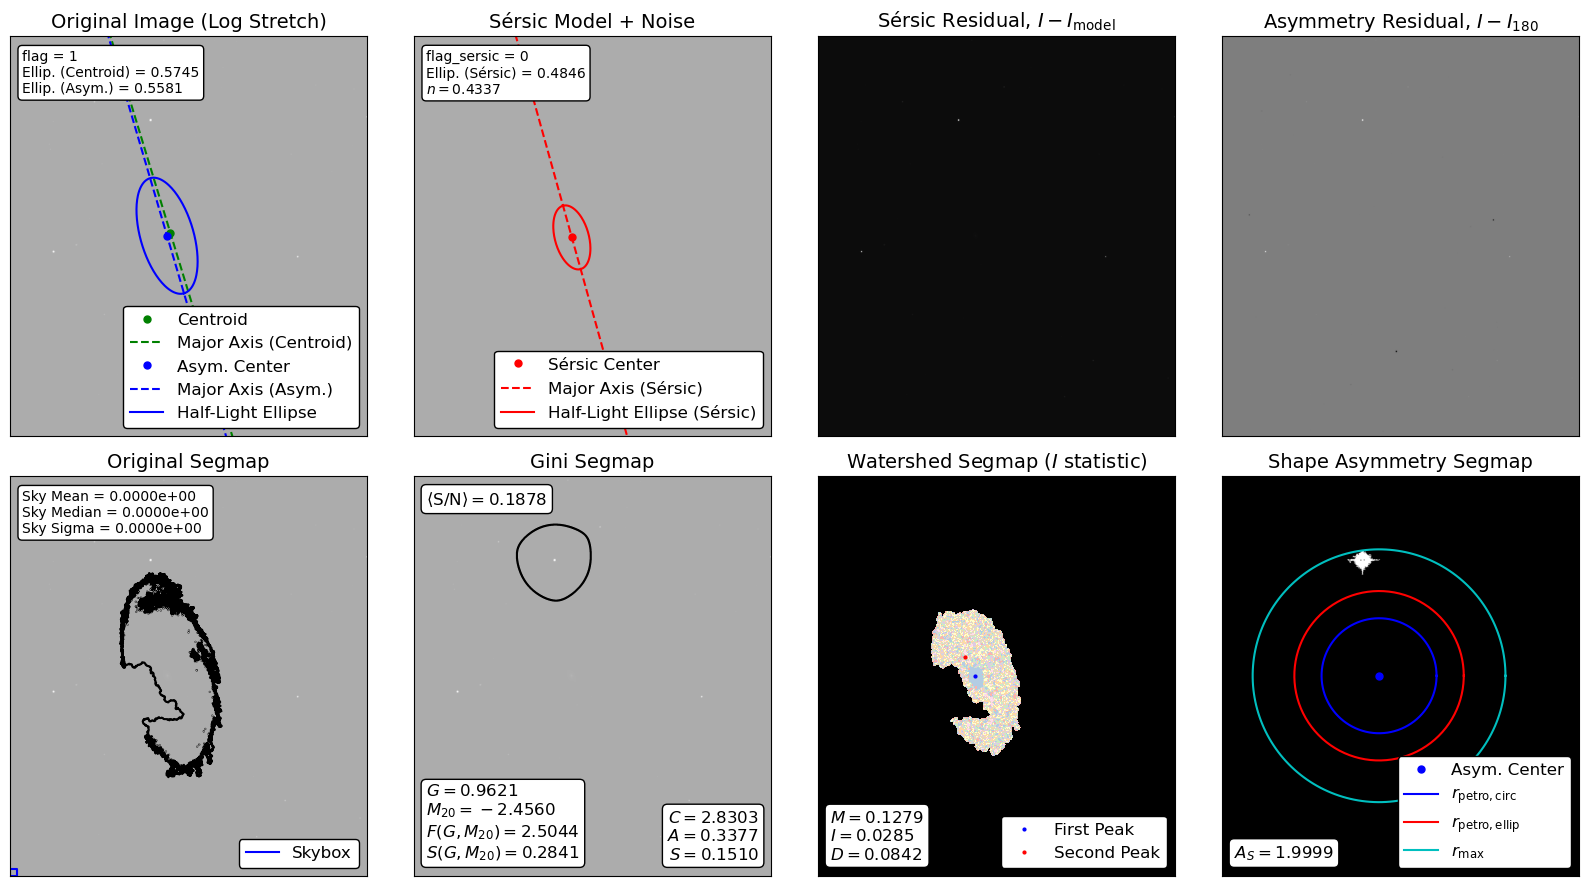

In [34]:
r_band_fits = 'RBAND_FILES/VFID0610-NGC5985-INT-20190530-p040-R.fits'
cs_gr_fits = 'HA_FILES/VFID0610-NGC5985-INT-20190530-p040-CS-gr.fits'
r_mask_fits = 'RMASK_FILES/VFID0610-NGC5985-INT-20190530-p040-R-mask.fits'

_ = run_statmorph(r_band_fits, cs_gr_fits, mask=None, filepath='testing_statmorph.csv')

### VFID0775

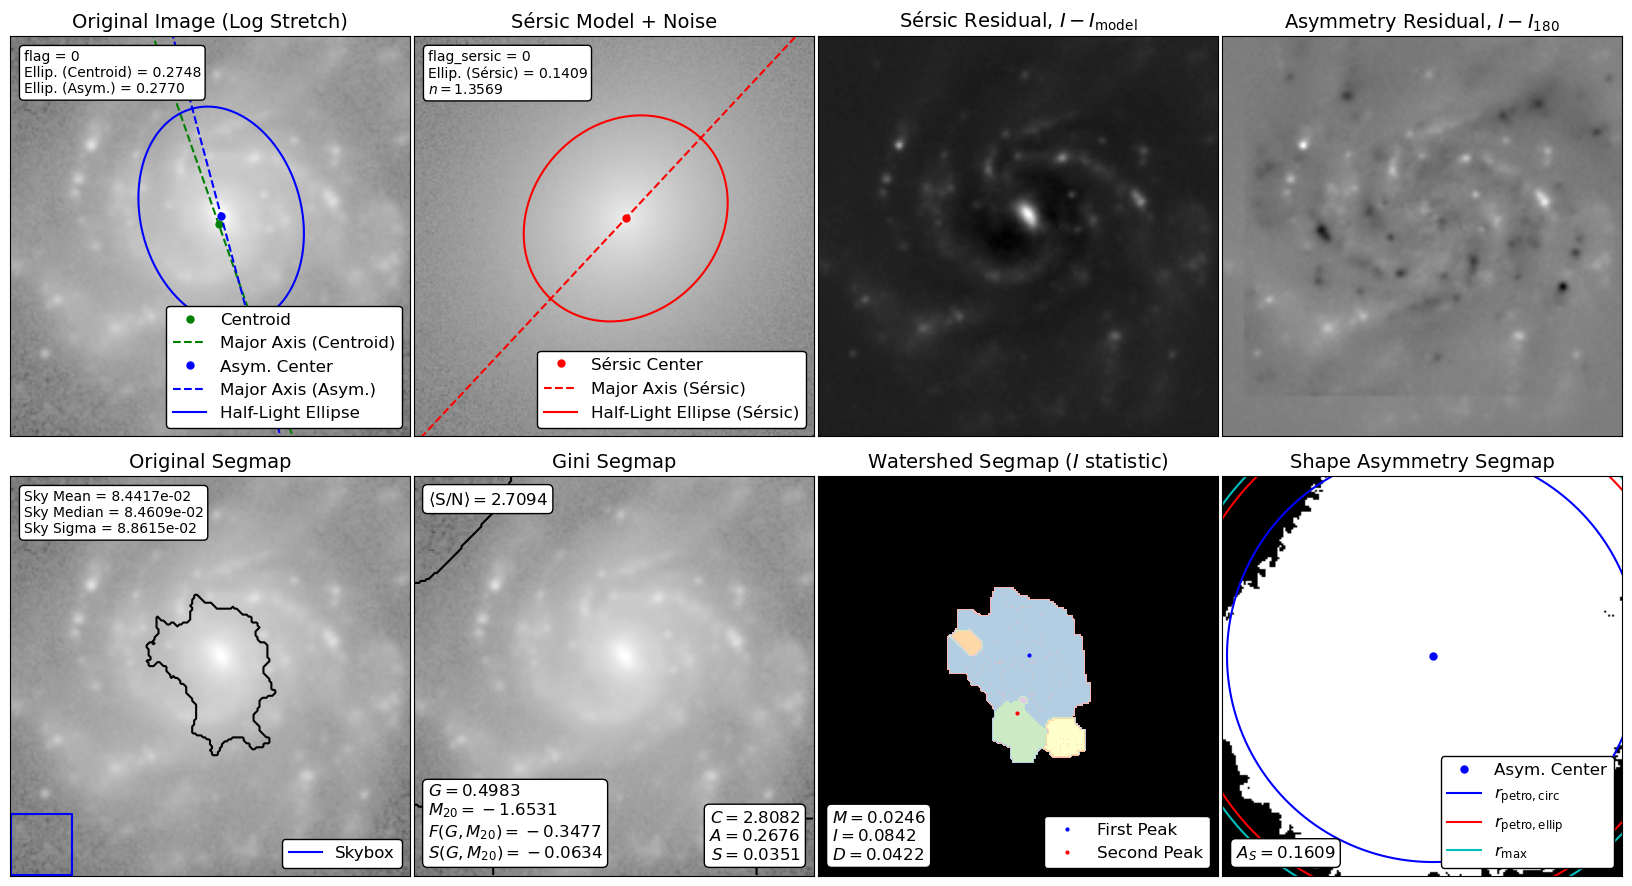

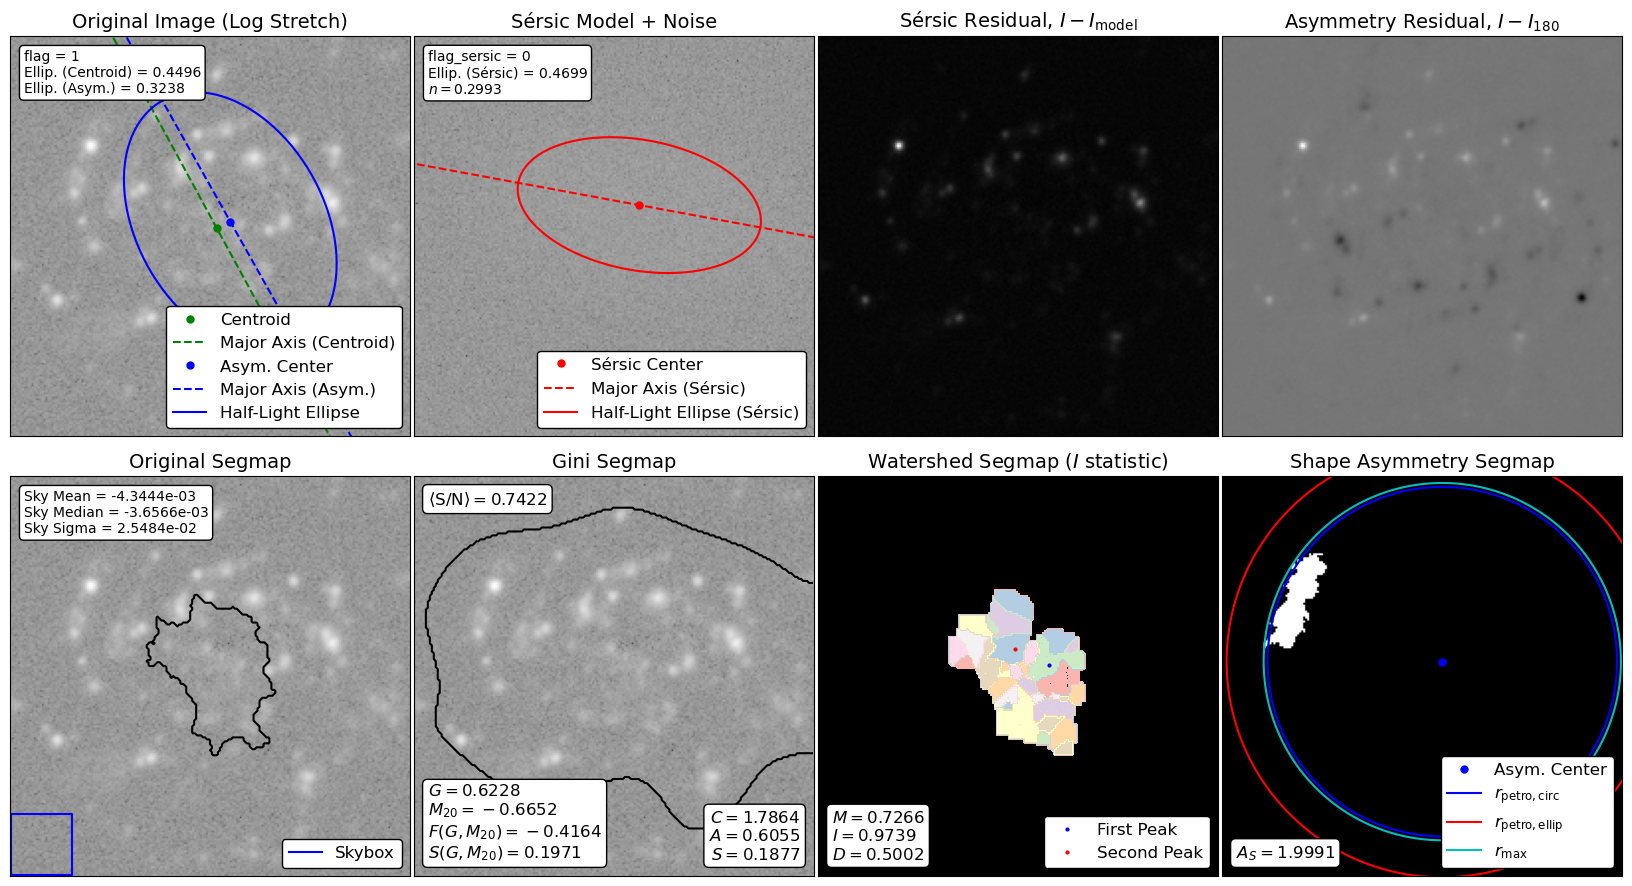

In [40]:
r_band_fits = 'RBAND_FILES/VFID0775-UGC09837-BOK-20220425-VFID0776-R.fits'
cs_gr_fits = 'HA_FILES/VFID0775-UGC09837-BOK-20220425-VFID0776-CS-gr.fits'
r_mask_fits = 'RMASK_FILES/VFID0775-UGC09837-BOK-20220425-VFID0776-R-mask.fits'

_ = run_statmorph(r_band_fits, cs_gr_fits, mask=None, filepath='testing_statmorph.csv')

### VFID 0956

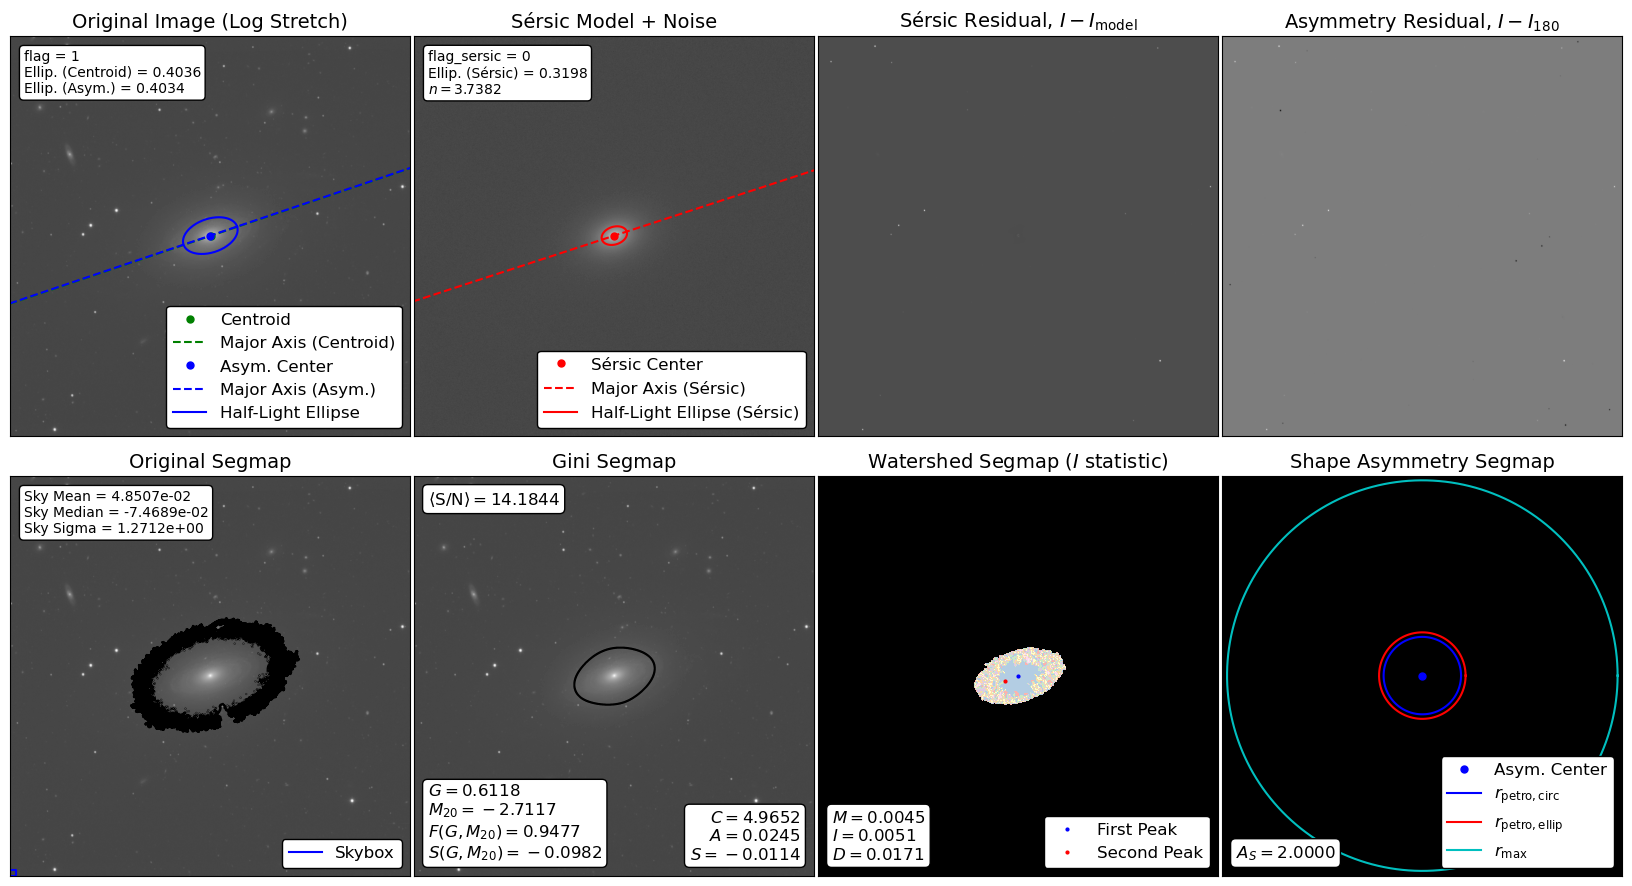

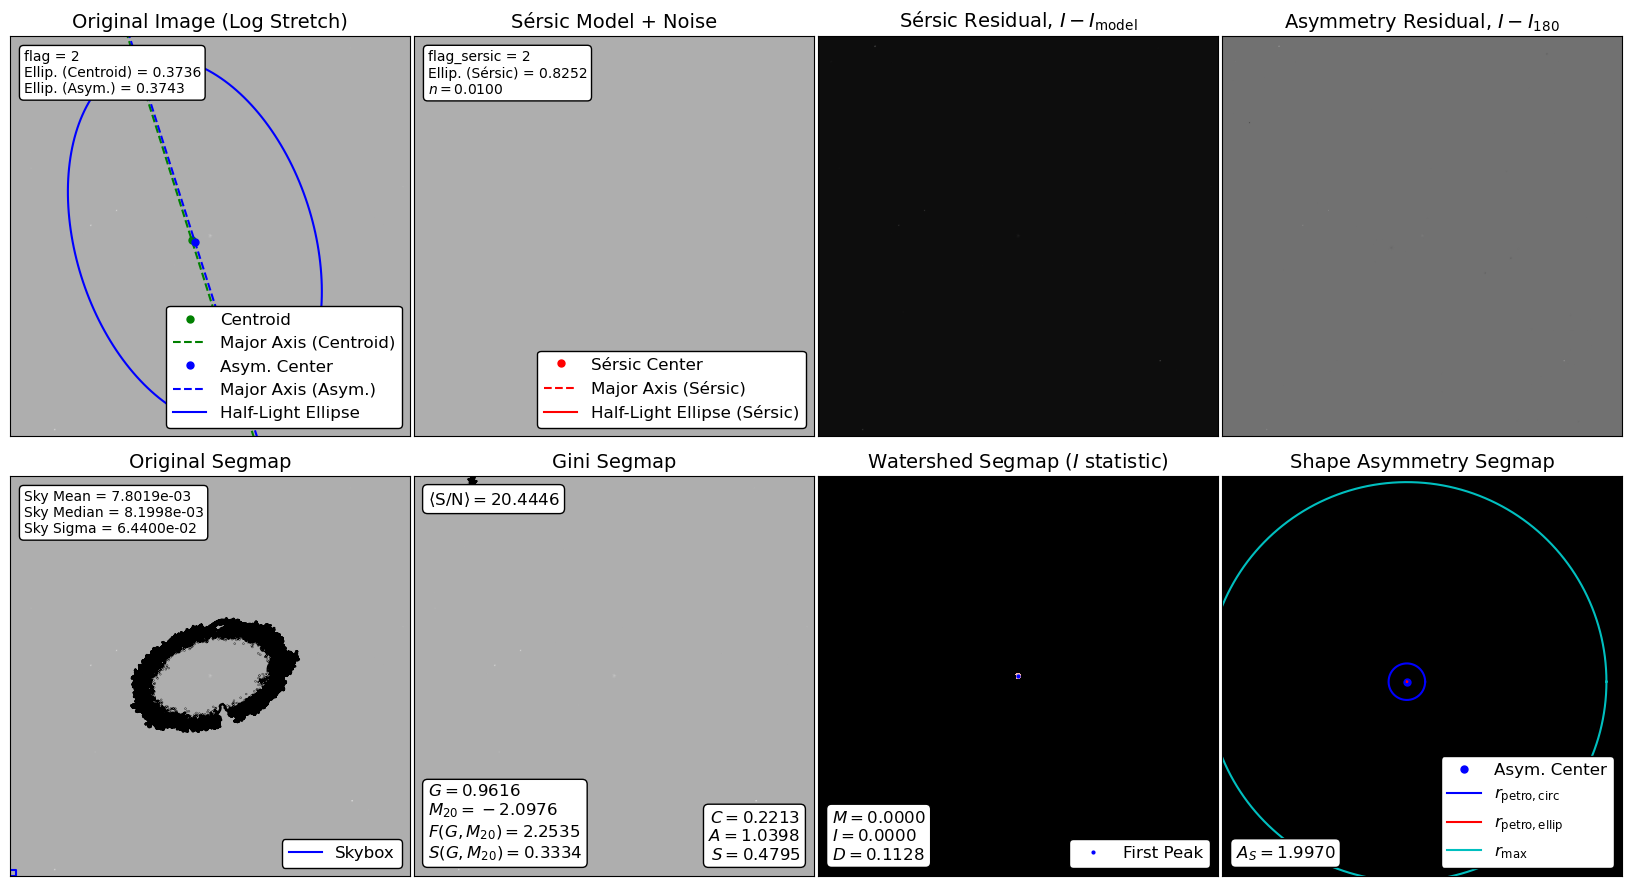

In [39]:
r_band_fits = 'RBAND_FILES/VFID0956-NGC3898-INT-20220502-VFID0957-R.fits'
cs_gr_fits = 'HA_FILES/VFID0956-NGC3898-INT-20220502-VFID0957-CS-gr.fits'
r_mask_fits = 'RMASK_FILES/VFID0956-NGC3898-INT-20220502-VFID0957-R-mask.fits'

_ = run_statmorph(r_band_fits, cs_gr_fits, mask=None, filepath='testing_statmorph.csv')

### Test Galaxies with double statmorph

In [48]:
test_ha = 'n4178hacljc.fits'
test_r = 'n4178nrcsScal.fits'

In [49]:
_ = run_statmorph(test_r, test_ha, mask=None, filepath='testing_statmorph.csv')

ValueError: Inconsistent data column lengths